<h1>Salary Predictions Based on Job Descriptions</h1>

# Part 1 - DEFINE

### ---- 1 Define the problem ----

To examine a set of job posting with salaries and use this data to predict the salaries for a new set of job postings.

The job market is complex. HR must have a clear understanding of what an appropriate salary is for a new hire and how various factors can affect the salary offered.


__author__ = 
__email__ =

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn as sk

## Part 2 - DISCOVER

<h3>2. Load the data</h3>

There are 3 datasets provided for this assignment. Load all three and have a look at the first 5 rows of each.

In [2]:
#load the data into a Pandas dataframe
salary_df = pd.read_csv('data/train_salaries.csv')
salary_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [3]:
train_features_df = pd.read_csv('data/train_features.csv')
train_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
test_features_df = pd.read_csv('data/test_features.csv')
test_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


<h3>3. Clean the data</h3>

Before using the data, its important to clean the data and look for invalid data (e.g. salaries <= 0), corrupt, or duplicate data and remove it.

The training data comes as two files: one with a jobID and salaries while the features that may affect the offered salary are in another.

In [5]:
# Start with the training files
salary_df.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


The minimum value is 0, which is probably an error. Remove these values.

In [6]:
salary_df.replace(0, np.nan, inplace=True)
salary_df.dropna()
salary_df.describe()

,salary
count,999995.000000
mean,116.062398
std,38.717163
min,17.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


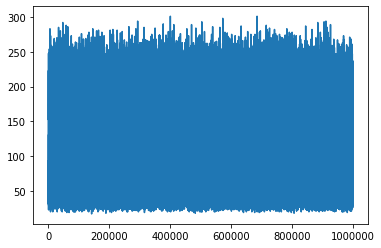

In [7]:
plt.plot(salary_df['salary'])

In [8]:
salary_df.duplicated('jobId').value_counts()

False    1000000
dtype: int64

In [9]:
salary_df.isnull().sum(axis = 0)

jobId     0
salary    5
dtype: int64

There were 5 values in the salary column that contained 0 as a yearly salary. These items were removed from the list.

Move onto the training features data.

In [10]:
train_features_df.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In the training features data set, 5 of the features are categorical and it is possible to have 0 as a value. Check this data for any missing (null) values.

In [11]:
train_features_df.shape

(1000000, 8)

In [12]:
# Are there any NaN values in this data set?
train_features_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

The training features df doesn't appear to have any missing (NaN) values.

Merge the two training set dataframes together.

In [13]:
training_df = pd.merge(salary_df, train_features_df, how='left', on='jobId')
training_df.describe

<bound method NDFrame.describe of                    jobId  salary companyId         jobType       degree  \
0       JOB1362684407687   130.0    COMP37             CFO      MASTERS   
1       JOB1362684407688   101.0    COMP19             CEO  HIGH_SCHOOL   
2       JOB1362684407689   137.0    COMP52  VICE_PRESIDENT     DOCTORAL   
3       JOB1362684407690   142.0    COMP38         MANAGER     DOCTORAL   
4       JOB1362684407691   163.0     COMP7  VICE_PRESIDENT    BACHELORS   
...                  ...     ...       ...             ...          ...   
999995  JOB1362685407682    88.0    COMP56  VICE_PRESIDENT    BACHELORS   
999996  JOB1362685407683   160.0    COMP24             CTO  HIGH_SCHOOL   
999997  JOB1362685407684    64.0    COMP23          JUNIOR  HIGH_SCHOOL   
999998  JOB1362685407685   149.0     COMP3             CFO      MASTERS   
999999  JOB1362685407686    88.0    COMP59          JUNIOR    BACHELORS   

            major   industry  yearsExperience  milesFromMetropoli

In [14]:
training_df['salary'].describe

<bound method NDFrame.describe of 0         130.0
1         101.0
2         137.0
3         142.0
4         163.0
          ...  
999995     88.0
999996    160.0
999997     64.0
999998    149.0
999999     88.0
Name: salary, Length: 1000000, dtype: float64>

In [15]:
training_df['salary'].min()

17.0

### ---- 4 Explore the data (EDA) ----

In [17]:
# Summarize each feature variable
features = list(training_df.columns)
print(features)

['jobId', 'salary', 'companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']


In [18]:
# Feature 1 = jobType
jobType_counts = training_df['jobType'].value_counts()
print(jobType_counts)

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64


In [19]:
# Select jobType
jobType = training_df[['jobType', 'salary']]

# Sort subcategories by median salary
grp_jobType = jobType.groupby(['jobType']).median()
sort_jobType = grp_jobType.sort_values(['salary'], ascending = False)
sort_jobType['Mean Salary'] = jobType.groupby(['jobType']).mean()
sort_jobType

,salary,Mean Salary
jobType,,
CEO,142.0,145.311425
CFO,132.0,135.458547
CTO,132.0,135.481067
VICE_PRESIDENT,122.0,125.368630
MANAGER,112.0,115.368518
SENIOR,102.0,105.487775
JUNIOR,92.0,95.333087
JANITOR,68.0,70.813045


[Text(0, 0, 'CEO'),
 Text(0, 0, 'CFO'),
 Text(0, 0, 'CTO'),
 Text(0, 0, 'VICE_PRESIDENT'),
 Text(0, 0, 'MANAGER'),
 Text(0, 0, 'SENIOR'),
 Text(0, 0, 'JUNIOR'),
 Text(0, 0, 'JANITOR')]

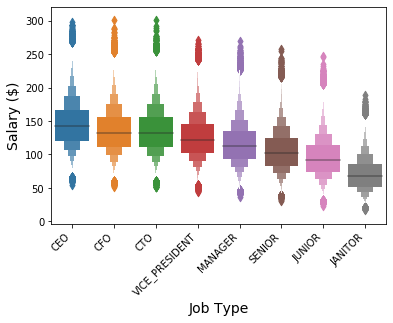

In [47]:
index_jobType = sort_jobType.index

# Graph
import seaborn as sns
plot_jobType = sns.boxenplot(x='jobType', y = 'salary', data= jobType, order= index_jobType)
plt.xlabel('Job Type', size = 14)
plt.ylabel('Salary ($)', size = 14)
plot_jobType.set_xticklabels(labels = index_jobType, rotation = 45, horizontalalignment = 'right')

There is a trend that shows that having a position that is higher up within a company, the median salary also increases.

In [21]:
# Feature 2 : "degree"
degree_counts = training_df['degree'].value_counts()
degree_counts

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

In [22]:
# Select degree column
degree = training_df[['degree', 'salary']]

# Group degrees and determine the median salary for each degree
grp_degree = degree.groupby('degree').median()
sort_degree = grp_degree.sort_values(['salary'], ascending = False)
sort_degree['Mean Salary'] = degree.groupby('degree').mean()
sort_degree


,salary,Mean Salary
degree,,
DOCTORAL,132.0,135.490979
MASTERS,127.0,130.505647
BACHELORS,122.0,125.454663
HIGH_SCHOOL,99.0,101.921085
NONE,95.0,98.176882


[Text(0, 0, 'DOCTORAL'),
 Text(0, 0, 'MASTERS'),
 Text(0, 0, 'BACHELORS'),
 Text(0, 0, 'HIGH_SCHOOL'),
 Text(0, 0, 'NONE')]

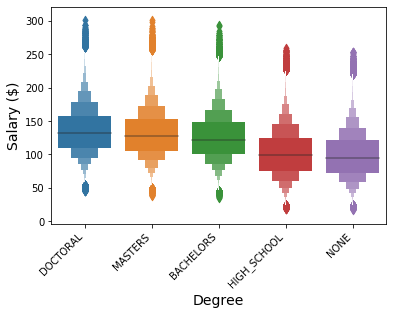

In [23]:
index_degree = sort_degree.index

# Graph
plot_degree = sns.boxenplot(x='degree', y='salary', data=degree, order=index_degree)
plt.xlabel("Degree", size = 14)
plt.ylabel("Salary ($)", size = 14)
plot_degree.set_xticklabels(labels = index_degree, rotation = 45, horizontalalignment = 'right')

# Summary for degree
As the number of degrees increases, there is an increase in the salary paid to the enployee.

In [25]:
# Feature 3 : major

# Major counts
major_counts = training_df['major'].value_counts()
major_counts

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

In [26]:
# Select major column
major = training_df[['major', 'salary']]

grp_major = major.groupby('major').median()
sort_major = grp_major.sort_values(['salary'], ascending = False)
sort_major['Mean Salary'] = major.groupby('major').mean()
sort_major

,salary,Mean Salary
major,,
ENGINEERING,135.0,138.441342
BUSINESS,132.0,135.648980
MATH,130.0,133.322042
COMPSCI,129.0,132.075605
PHYSICS,127.0,130.372436
CHEMISTRY,126.0,129.072085
BIOLOGY,125.0,127.932664
LITERATURE,122.0,124.423097
NONE,100.0,102.583864


[Text(0, 0, 'ENGINEERING'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'MATH'),
 Text(0, 0, 'COMPSCI'),
 Text(0, 0, 'PHYSICS'),
 Text(0, 0, 'CHEMISTRY'),
 Text(0, 0, 'BIOLOGY'),
 Text(0, 0, 'LITERATURE'),
 Text(0, 0, 'NONE')]

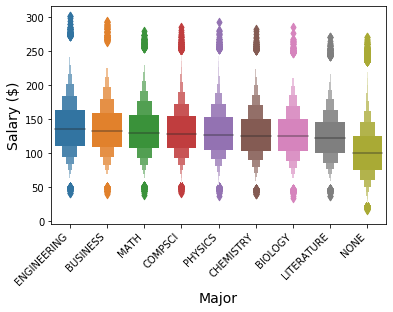

In [27]:
index_major = sort_major.index

# Graph
plot_major = sns.boxenplot(x='major', y='salary', data= major, order=index_major)
plt.xlabel("Major", size= 14)
plt.ylabel("Salary ($)", size= 14)
plot_major.set_xticklabels(labels= index_major, rotation = 45, horizontalalignment = 'right')

The data shows that the college major that was chosen does not have a large impact on the salary paid. Even those with no college major have the potential to earn over $250K per year.

In [28]:
# Feature 4 : industry

# Major counts
industry_counts = training_df['industry'].value_counts()
industry_counts

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

In [29]:
# Select industry column
industry = training_df[['industry', 'salary']]

grp_industry = industry.groupby('industry').median()
sort_industry = grp_industry.sort_values(['salary'], ascending = False)
sort_industry['Mean Salary'] = industry.groupby('industry').mean()
sort_industry

,salary,Mean Salary
industry,,
FINANCE,128.0,130.747659
OIL,128.0,130.953863
WEB,119.0,121.645362
HEALTH,114.0,115.735540
AUTO,108.0,109.435222
SERVICE,103.0,104.446820
EDUCATION,98.0,99.448386


[Text(0, 0, 'FINANCE'),
 Text(0, 0, 'OIL'),
 Text(0, 0, 'WEB'),
 Text(0, 0, 'HEALTH'),
 Text(0, 0, 'AUTO'),
 Text(0, 0, 'SERVICE'),
 Text(0, 0, 'EDUCATION')]

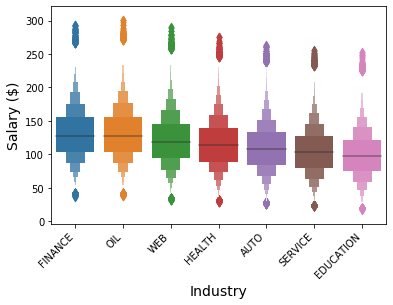

In [30]:
index_industry = sort_industry.index

# Graph
plot_industry= sns.boxenplot(x='industry', y='salary', data= industry, order=index_industry)
plt.xlabel("Industry", size= 14)
plt.ylabel("Salary ($)", size= 14)
plot_industry.set_xticklabels(labels= index_industry, rotation = 45, horizontalalignment = 'right')

(array([39839., 40265., 40045., 40191., 40036., 40013., 40095., 40047.,
        40118., 40235., 40032., 39949., 39467., 39826., 39827., 40312.,
        39873., 40072., 40089., 39860., 39988., 39759., 40187., 40015.,
        39860.]),
 array([ 0.  ,  0.96,  1.92,  2.88,  3.84,  4.8 ,  5.76,  6.72,  7.68,
         8.64,  9.6 , 10.56, 11.52, 12.48, 13.44, 14.4 , 15.36, 16.32,
        17.28, 18.24, 19.2 , 20.16, 21.12, 22.08, 23.04, 24.  ]),
 <a list of 25 Patch objects>)

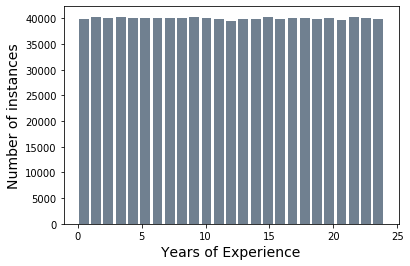

In [66]:
# Feature 5 : years of experience
# Years of experience is interval data, which gives us a scale that gives us the order of values and the ability to quantify the difference between each one.

# Histogram of the year of experience
plot_experience = plt.hist(training_df['yearsExperience'], bins=25, color= 'slategrey', rwidth=0.8)
plt.xlabel("Years of Experience", size = 14)
plt.ylabel("Number of instances", size = 14)
plot_experience

Text(0.5, 0, 'Miles from Metropolis')

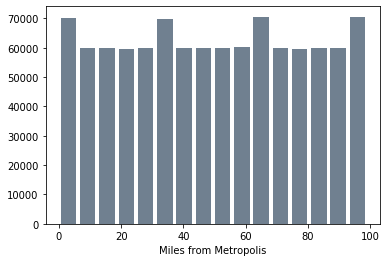

In [70]:
# Feature 6 : miles from metropolis
# This feature is another numerical variable
# Graph
plot_distance = plt.hist(training_df['milesFromMetropolis'], color = 'slategrey', rwidth = 0.8, bins=16)
plt.xlabel("Miles from Metropolis")

Text(0, 0.5, 'Number of instances')

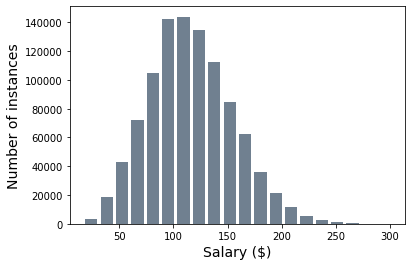

In [73]:
# Target Feature : Salary

# Graph
plot_salary = plt.hist(training_df['salary'], color= 'slategrey', rwidth = 0.8, bins= 20)
plt.xlabel("Salary ($)", size= 14)
plt.ylabel("Number of instances", size= 14)

In [86]:
#look for correlation between each feature and the target

correlation = training_df.corr()
correlation.style.background_gradient(cmap= 'BuPu')

,salary,yearsExperience,milesFromMetropolis
salary,1,0.375013,-0.297686
yearsExperience,0.375013,1,0.000672698
milesFromMetropolis,-0.297686,0.000672698,1


In [ ]:
#look for correlation between features

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data